# Pandas 시각화
판다시 자체적으로 matplotlib 를 기반으로 한 시각화기능을 지원한다.    
Series나 DataFrame에 plot() 함수나 plot accessor를 사용한다.
- https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

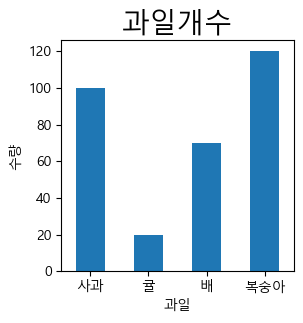

In [2]:
values = pd.Series([100, 20, 70, 120], index=["사과", "귤", "배", "복숭아"])
values.plot(kind="bar", title="과일개수", figsize=(3,3), 
            xlabel="과일", ylabel="수량", rot=0)
# plt.title('과일의 개수')
# plt.xlabel("과일")
# plt.ylabel('수량')
plt.show()

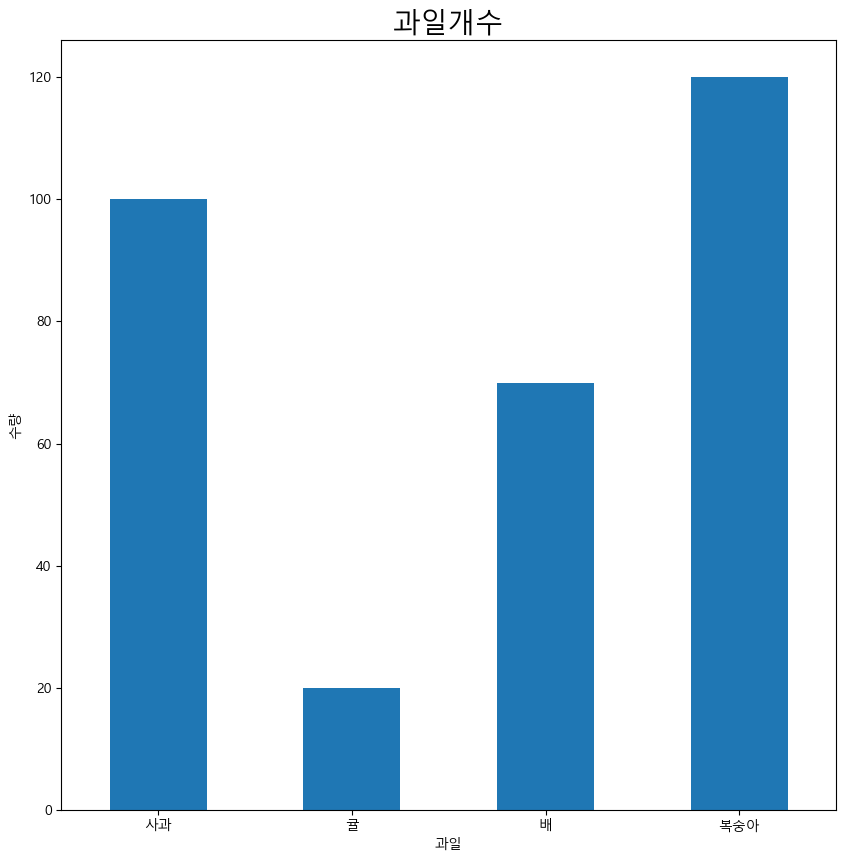

In [12]:
values.plot.bar(title="과일개수", figsize=(10,10), 
                xlabel="과일", ylabel="수량", rot=0)
plt.show()

## plot() 
- kind 매개변수에 지정한 값에 따라 다양한 그래프를 그릴 수 있다.
- kind : 그래프 종류 지정
    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'pie' : pie plot
    - 'scatter' : scatter plot

matplotlib를 이용해 여러 설정들 가능

## 막대 그래프
- index가 무슨 값인지를 가리키는 축으로 사용된다.

In [3]:
tips = pd.read_csv('data/tips.csv')
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [15]:
# 요일별 테이블수
result = tips['day'].value_counts()
result

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

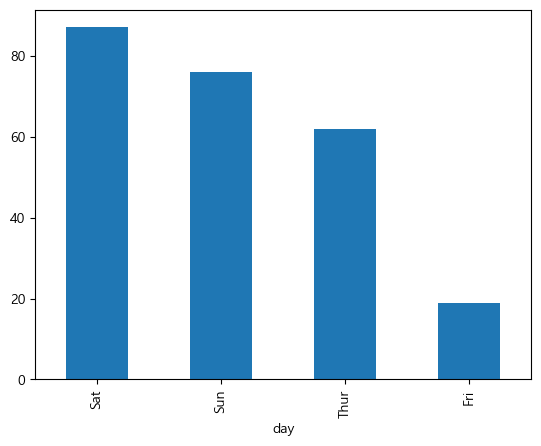

In [19]:
result.plot(kind="bar");

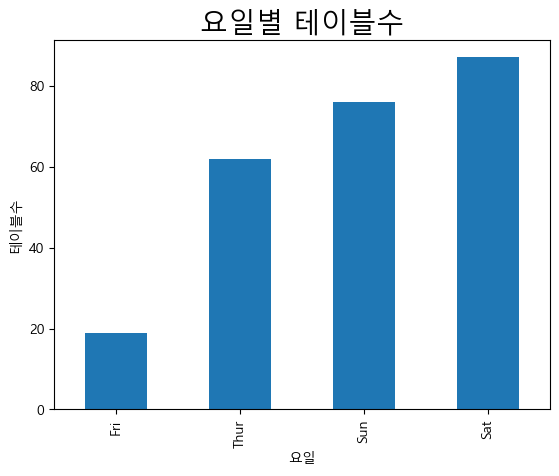

In [27]:
result.sort_values().plot(kind='bar', title="요일별 테이블수",
                          xlabel='요일', ylabel='테이블수');

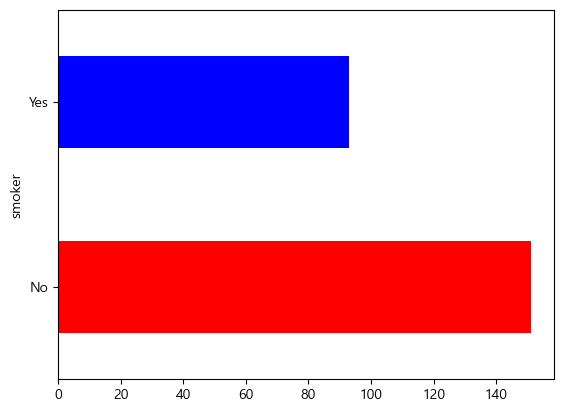

In [32]:
# 흡연여부별 테이블수 
tips['smoker'].value_counts().plot(kind='barh', color=['red', 'blue']);

- 두개의 분류 별로 그리기
    - 여러개의 컬럼일 경우 수평 누적 막대그래프를 그린다.


In [33]:
# 흡연여부+성별 테이블 수
# index-> X축에 넣을 컬럼명(goup으로 묶을 컬럼중에서)
agg_df = tips.pivot_table(index="smoker", columns="sex", values="tip", aggfunc='count')
agg_df

sex,Female,Male
smoker,,
No,54,97
Yes,33,60


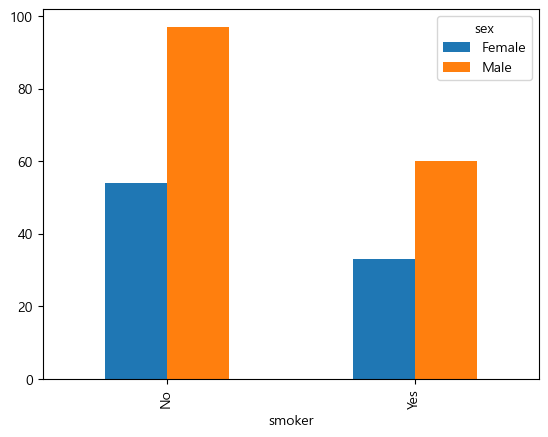

In [34]:
agg_df.plot(kind='bar');

In [27]:
# 요일/성별 손님의 총수 (size의 sum)
result = tips.pivot_table(index="sex", columns='day', values="size", aggfunc="sum")
result

day,Fri,Sat,Sun,Thur
sex,,,,
Female,19,63,53,79
Male,21,156,163,73


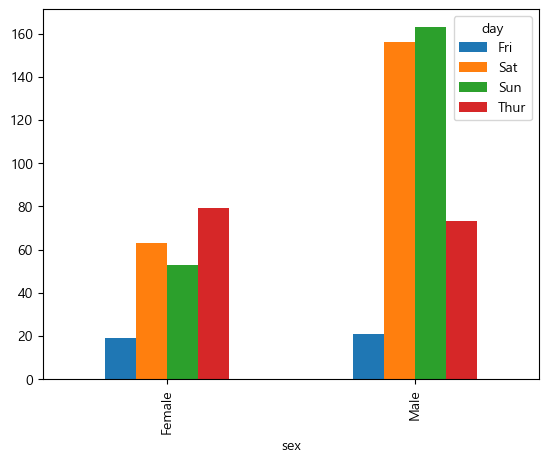

In [36]:
result.plot(kind='bar');

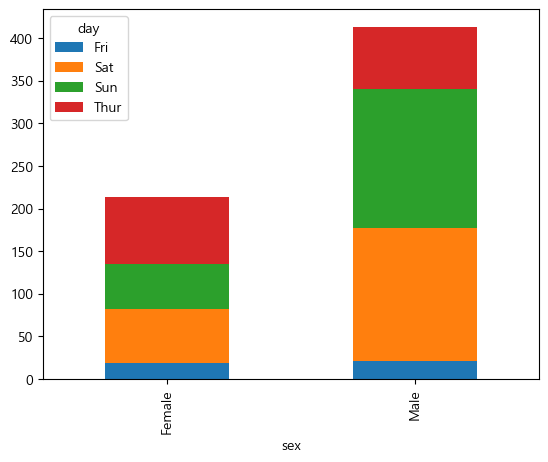

In [37]:
result.plot(kind='bar', stacked=True);

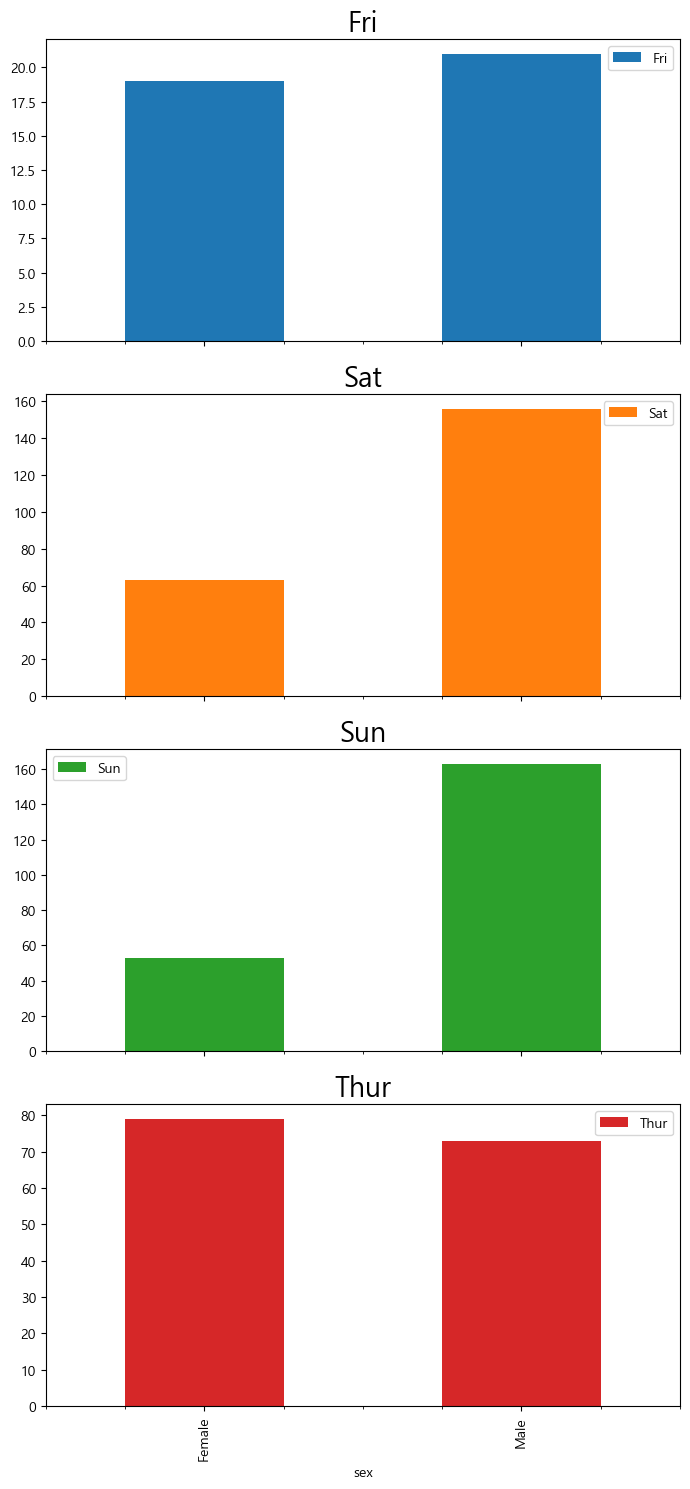

In [28]:
result.plot(kind='bar', subplots=True, figsize=(7, 15))
plt.tight_layout()
plt.show()

## 파이차트

In [4]:
import pandas as pd
tips = pd.read_csv('data/tips.csv')

In [6]:
tips['day'].value_counts()#개수
tips['day'].value_counts(normalize=True)  # 비율

day
Sat     0.356557
Sun     0.311475
Thur    0.254098
Fri     0.077869
Name: proportion, dtype: float64

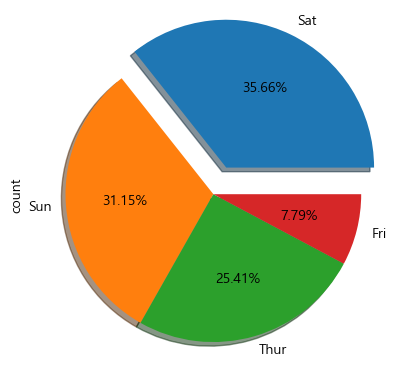

In [12]:
result = tips['day'].value_counts()
result.plot(kind='pie', autopct='%.2f%%', explode=[0.2, 0, 0, 0], shadow=True);

In [10]:
result

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

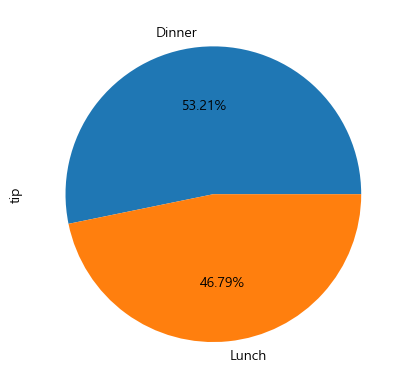

In [18]:
tips.groupby('time')['tip'].mean().plot(kind='pie', autopct='%.2f%%');

## 히스토그램, KDE(커널밀도추정그래프)

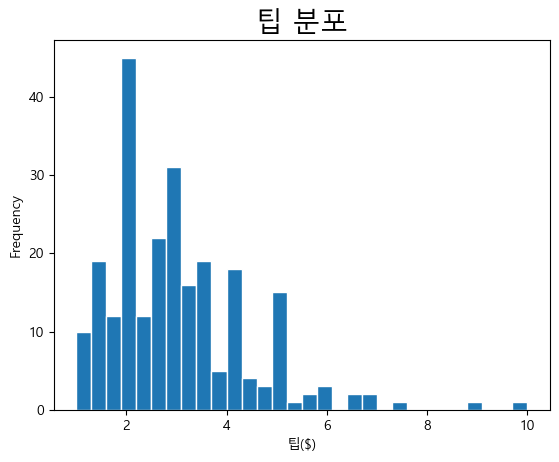

In [24]:
tips['tip'].plot(kind='hist', bins=30, title='팁 분포',
                 xlabel='팁($)', edgecolor='white');

In [29]:
pd.__version__

'2.0.0'

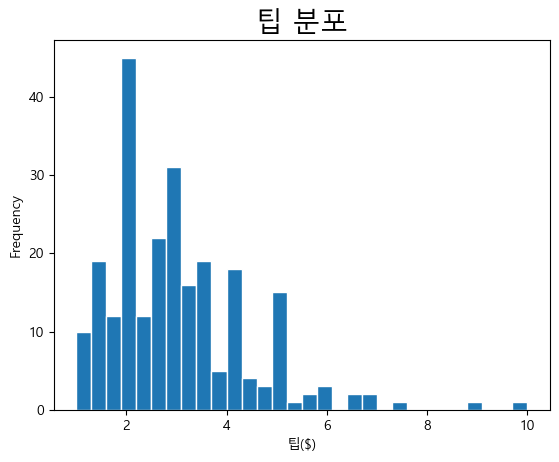

In [25]:
tips['tip'].plot.hist(bins=30, title='팁 분포',
                 xlabel='팁($)', edgecolor='white');

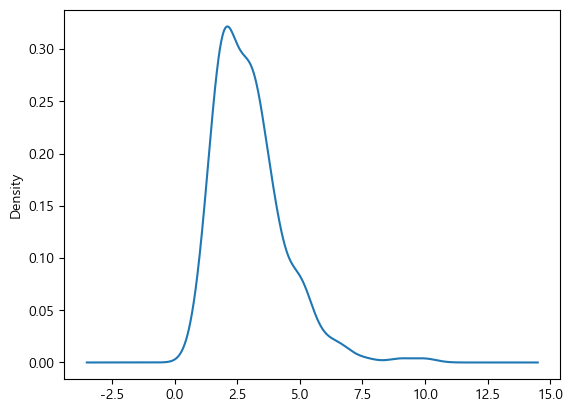

In [37]:
tips['tip'].plot(kind='kde');

In [36]:
# !pip install scipy

  Using cached scipy-1.10.1-cp310-cp310-win_amd64.whl (42.5 MB)


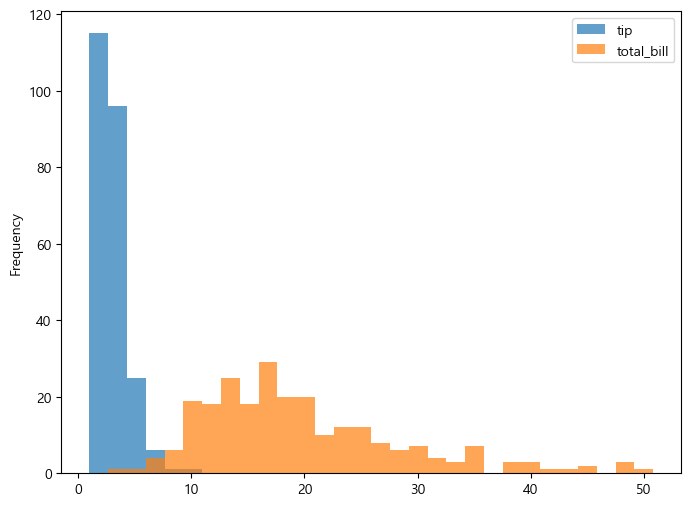

In [34]:
tips[['tip', 'total_bill']].plot(kind='hist', bins=30, alpha=0.7, figsize=(8,6));


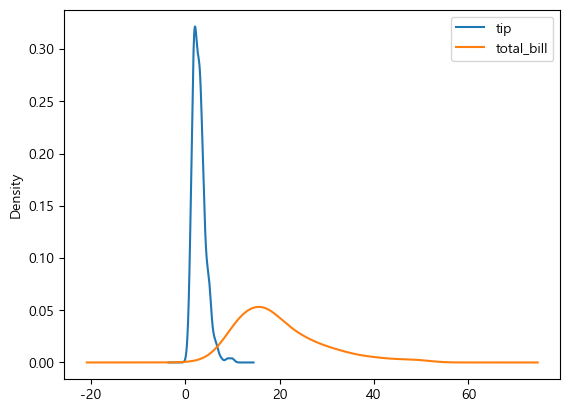

In [38]:
tips[['tip', 'total_bill']].plot(kind='kde');

## Boxplot (상자그래프)

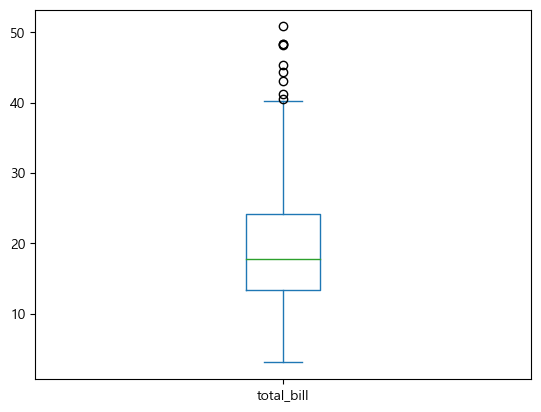

In [40]:
tips['total_bill'].plot(kind='box');

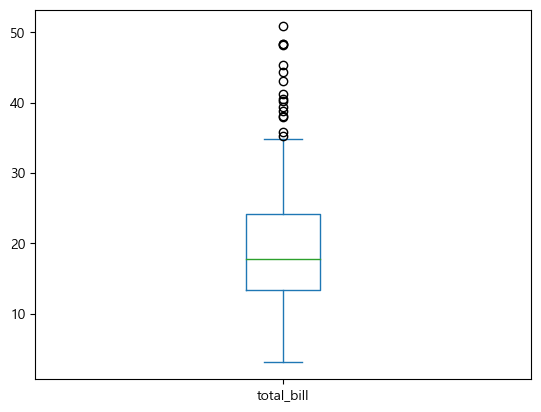

In [45]:
# tips['total_bill'].plot(kind='box', whis=3);
tips['total_bill'].plot(kind='box', whis=1);

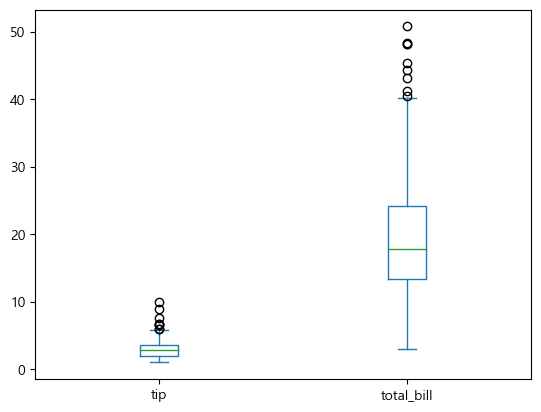

In [43]:
tips[['tip', 'total_bill']].plot.box();

## scatter plot (산점도) 

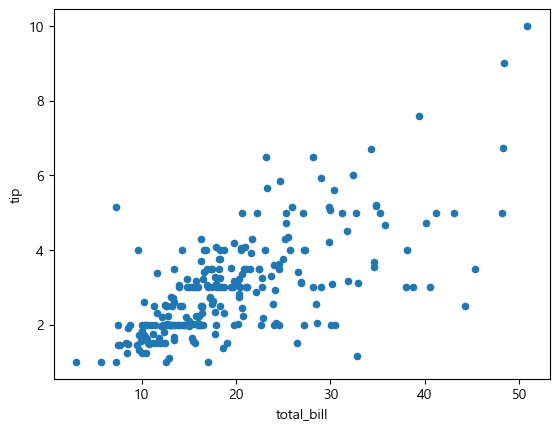

In [46]:
# DataFrame을 이용해 그린다. (Series는 그릴 수 없다.)
tips.plot(kind='scatter', x="total_bill", y="tip");  # x, y 축에 위치할 컬럼명을 지정.

In [47]:
tips[['tip', 'total_bill']].corr()

,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


<Axes: xlabel='tip', ylabel='tip'>

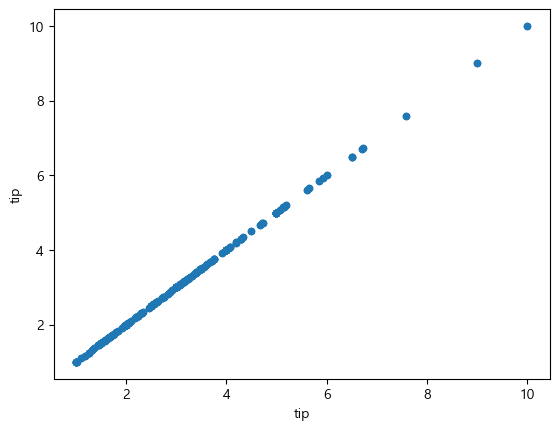

In [48]:
tips[['tip', 'tip']].plot(kind='scatter', x='tip', y='tip')

### line plot

In [49]:
df = pd.read_excel('data/강수량.xlsx', index_col='계절')
df.head()

,2009,2010,2011,2012,2013,2014,2015,2016,2017
계절,,,,,,,,,
봄,231.3,302.9,256.9,256.5,264.3,215.9,223.2,312.8,118.6
여름,752.0,692.6,1053.6,770.6,567.5,599.8,387.1,446.2,609.7
가을,143.1,307.6,225.5,363.5,231.2,293.1,247.7,381.6,172.5
겨울,142.3,98.7,45.6,139.3,59.9,76.9,109.1,108.1,75.6


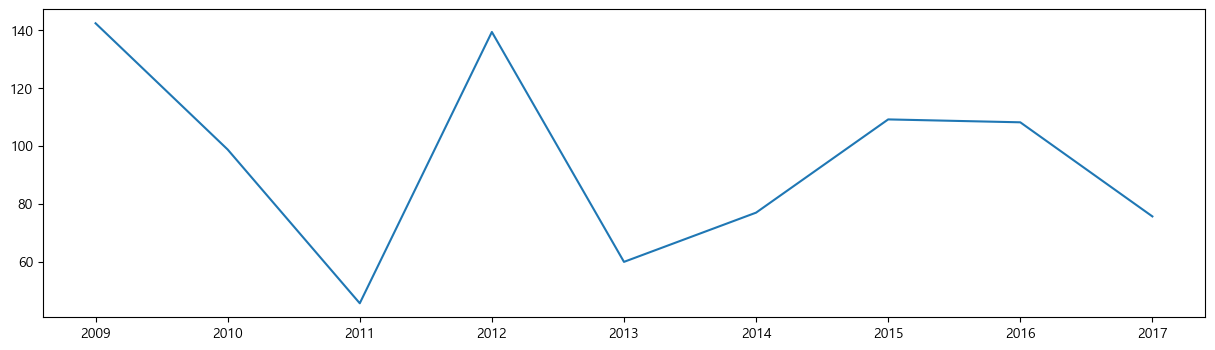

In [53]:
df.loc['겨울'].plot(figsize=(15, 4));

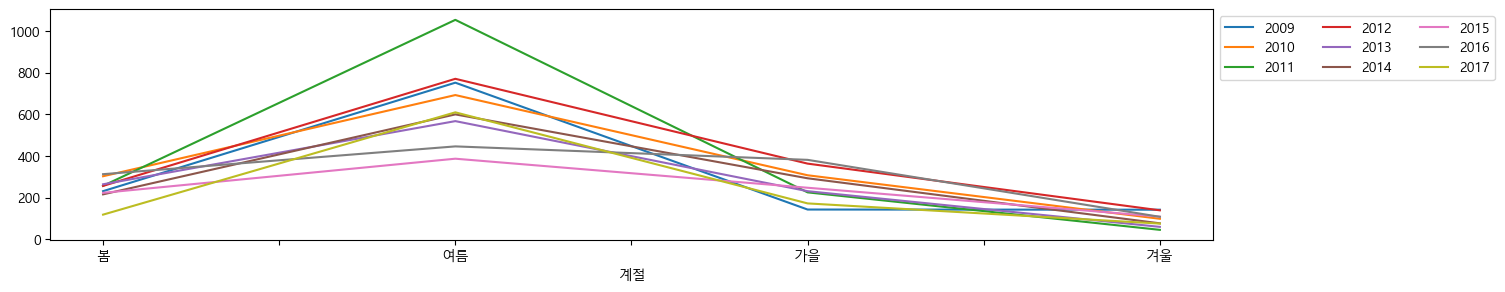

In [67]:
df.plot(figsize=(15,3))
plt.legend(bbox_to_anchor=(1,1), loc="upper left", ncol=3)

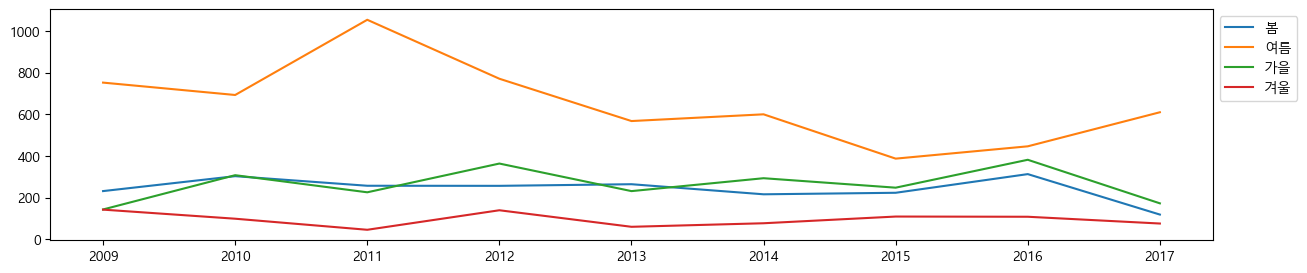

In [59]:
df.T.plot(figsize=(15,3))
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()